In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Dataset/Titanic-Dataset.csv')
df1=df
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# find null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# select features and target
df2=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']].copy()
df2.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
612,3,female,NaN,1,0,15.5000,Q,1
192,3,female,19.0,1,0,7.8542,S,1
846,3,male,NaN,8,2,69.5500,S,0
490,3,male,NaN,1,0,19.9667,S,0
703,3,male,25.0,0,0,7.7417,Q,0
472,2,female,33.0,1,2,27.7500,S,1
16,3,male,2.0,4,1,29.1250,Q,0
326,3,male,61.0,0,0,6.2375,S,0
888,3,female,NaN,1,2,23.4500,S,0
136,1,female,19.0,0,2,26.2833,S,1


In [5]:
# handle missing values
df2['Age'].fillna(df['Age'].median(),inplace=True)
df2['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [6]:
df2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
le=LabelEncoder()
df2['Sex']=le.fit_transform(df2['Sex']) # male:1, female:0
df2['Embarked']=le.fit_transform(df2['Embarked']) # C=0, Q=1, S=2
df2.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0
5,3,1,28.0,0,0,8.4583,1,0
6,1,1,54.0,0,0,51.8625,2,0
7,3,1,2.0,3,1,21.0750,2,0
8,3,0,27.0,0,2,11.1333,2,1
9,2,0,14.0,1,0,30.0708,0,1


In [8]:
x=df2.drop('Survived',axis=1)
y=df['Survived']
x.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
809,1,0,33.0,1,0,53.1000,2
541,3,0,9.0,4,2,31.2750,2
484,1,1,25.0,1,0,91.0792,0
856,1,0,45.0,1,1,164.8667,2
96,1,1,71.0,0,0,34.6542,0
80,3,1,22.0,0,0,9.0000,2
546,2,0,19.0,1,0,26.0000,2
334,1,0,28.0,1,0,133.6500,2
737,1,1,35.0,0,0,512.3292,0
770,3,1,24.0,0,0,9.5000,2


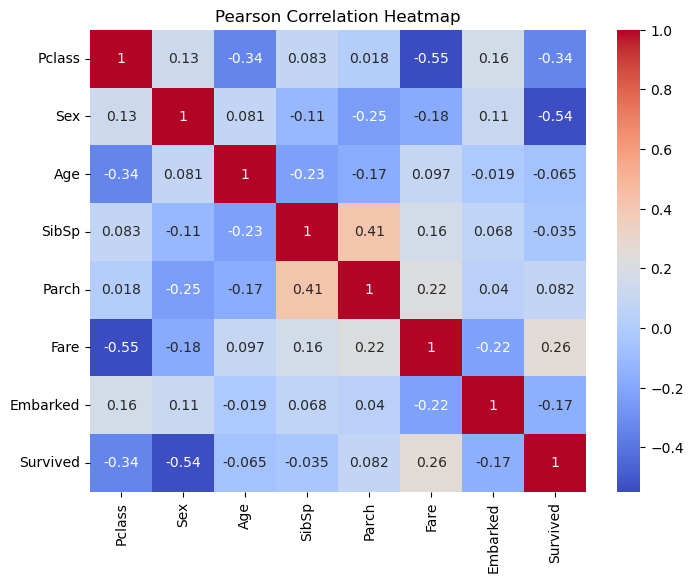

In [9]:
# compare pearson correlation
corr=df2.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

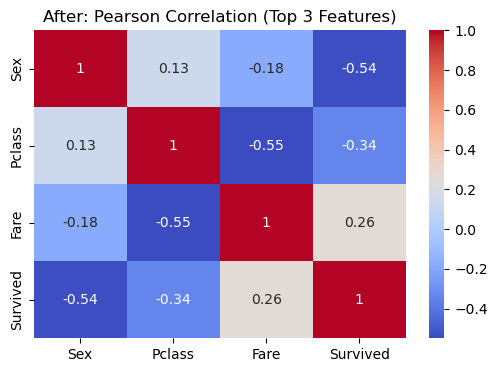

In [10]:
corr_matrix=df2.corr()
strong_corr=corr_matrix['Survived'].abs().sort_values(ascending=False)
selected=strong_corr[1:4].index.tolist() # top 3 features excluding target

# After selection
plt.figure(figsize=(6,4))
sns.heatmap(df2[selected+['Survived']].corr(),annot=True,cmap='coolwarm')
plt.title('After: Pearson Correlation (Top 3 Features)')
plt.show()